# Wrangle and Analyze Data: WeRateDogs

## Introduction

The goal of this project is wrangling WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information, hence additional gathering, assessing and cleaning is required for worthy analyses and visualizations.

In [1]:
# Importing all required libraries

# General libraries

import pandas as pd
import numpy as np

import os

#To help reading html files
from bs4 import BeautifulSoup

#To donwload files programatically.
import requests

#To query the Twitter API and 
import tweepy
import json



## Gather

In [2]:
# Reading provided file from UDACITY
twitter_data = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# Downloading programmatically using the Requests library and the following URL: 

    #Requesting file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

    # Write tsv file   
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

    #Read data in tabular format
Imagenes_data = pd.read_csv('image-predictions.tsv', sep='\t' )

In [143]:
# Creating an API object to gather data from Twitter

consumer_key = '6qq2S76RYxQU9SHUxh4HA88ZF'
consumer_secret = 'Zt8IW3XUezRBMCkZVFScytQKzpvh56lDqk7l2lXrjjqsOHD0Ci'
access_token = '1034941704858730497-B6fs2Rg76YjgRocLffVukK0tix6Ig7'
access_secret = 'wBinKmdIJERV3FulmpqcQdfHyj2UeezfN7fWVw803Ppq7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret,)

api = tweepy.API(auth)

In [144]:
#Twitter Query using tweet_id information from the twitter_data.
tweet_errors=[]

#tweet_ids = list(twitter_data.tweet_id)
API_tweet_data = []

# Creating the API_tweet_data dataframe

for tweet in twitter_data.tweet_id:  
    try:
        tweet_status = api.get_status(tweet, tweet_mode='extended',  wait_on_rate_limit_notify = True, wait_on_rate_limit = True)._json
        API_tweet_data.append({'tweet_id':tweet,
                        'retweet_count':tweet_status['retweet_count'],
                        'favorite_count':tweet_status['favorite_count'],
                        'text':tweet_status['full_text'],
                        'retweeted': tweet_status['retweeted'],
                        'date_time':tweet_status['created_at']})

        
    except: 
        print("Found an error in tweet with ID: " + str(tweet))
        tweet_errors.append(tweet)

Found an error in tweet with ID: 888202515573088257
Found an error in tweet with ID: 873697596434513921
Found an error in tweet with ID: 872668790621863937
Found an error in tweet with ID: 869988702071779329
Found an error in tweet with ID: 866816280283807744
Found an error in tweet with ID: 861769973181624320
Found an error in tweet with ID: 845459076796616705
Found an error in tweet with ID: 842892208864923648
Found an error in tweet with ID: 837012587749474308
Found an error in tweet with ID: 827228250799742977
Found an error in tweet with ID: 802247111496568832
Found an error in tweet with ID: 775096608509886464
Found an error in tweet with ID: 771004394259247104
Found an error in tweet with ID: 770743923962707968


Rate limit reached. Sleeping for: 579


Found an error in tweet with ID: 758740312047005698
Found an error in tweet with ID: 754011816964026368


Rate limit reached. Sleeping for: 552


Found an error in tweet with ID: 676957860086095872


In [145]:
tweet_errors

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 758740312047005698,
 754011816964026368,
 676957860086095872]

In [146]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(API_tweet_data, columns = ['tweet_id','retweet_count', 'favorite_count',
                                               'text','retweeted', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [4]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

## Assessing 

The following lines are intended to assess and overview the information from the obtained data sets. 
At the end of the section it can be found a summary of some of the issued encountered

In [5]:
# Getting basic general info from the three data sets. 
# Assessing WeRateDogs Twitter archive
twitter_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


(0, 10)

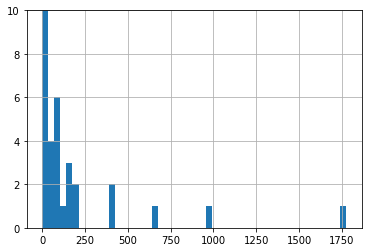

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
plot=twitter_data.rating_numerator.hist(bins=50)
plot.set_ylim([0,10])

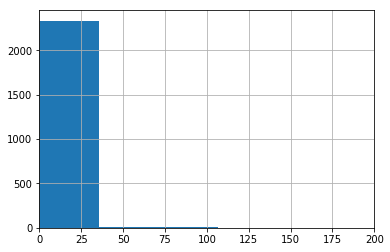

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline
plot=twitter_data.rating_numerator.hist(bins=50)
plot=plot.set_xlim([0,200])

In [9]:
twitter_data.tweet_id.unique().size

2356

In [10]:
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
twitter_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
twitter_data[twitter_data.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twitter_data[twitter_data.expanded_urls.duplicated()].size

2329

In [14]:
twitter_data.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [15]:
print("There are", twitter_data.doggo.value_counts()[1], "doggos")
print("There are",twitter_data.doggo.value_counts()[1], "floofers")
print("There are", twitter_data.pupper.value_counts()[1], "puppers")
print("There are", twitter_data.puppo.value_counts()[1], "puppos")
twitter_data.doggo.value_counts()[1]+twitter_data.doggo.value_counts()[1]+twitter_data.pupper.value_counts()[1]+twitter_data.puppo.value_counts()[1]

There are 97 doggos
There are 97 floofers
There are 257 puppers
There are 30 puppos


481

In [16]:
twitter_data.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
an            7
Buddy         7
Bailey        7
Toby          7
Oscar         6
Scout         6
Milo          6
Dave          6
Stanley       6
Koda          6
Jack          6
Rusty         6
Bella         6
Jax           6
Leo           6
Phil          5
           ... 
Ruffles       1
Ricky         1
Shikha        1
Gustaf        1
Monty         1
Reptar        1
Zeek          1
DonDon        1
Randall       1
Karl          1
Jennifur      1
Schnozz       1
Rodney        1
Ralf          1
Mosby         1
Ozzie         1
Maxwell       1
Rascal        1
Zooey         1
Remy          1
all           1
this          1
Jarod         1
Livvie        1
Philippe      1
Loomis        1
Clifford      1
Chef          1
Stark         1
William       1
Name: name, Length: 957,

In [17]:
# Getting basic general info from the three data sets. 
# Assessing  tweet image predictions archive
Imagenes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
Imagenes_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
Imagenes_data.tweet_id.unique().size

2075

In [20]:
Imagenes_data[(Imagenes_data['p1_dog'] == False) & (Imagenes_data['p2_dog'] ==False ) & (Imagenes_data['p3_dog'] == False )].shape

(324, 12)

In [21]:
Imagenes_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
Imagenes_data.jpg_url.value_counts()
Imagenes_data.jpg_url.unique().size

2009

In [23]:
Imagenes_data.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [24]:
# Getting basic general info from the three data sets. 
# Assessing archive get with Tweepy library and saved as tweet_json.txt
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
text              2339 non-null object
retweeted         2339 non-null bool
date_time         2339 non-null object
dtypes: bool(1), int64(3), object(2)
memory usage: 93.7+ KB


In [25]:
tweet_data

,tweet_id,retweet_count,favorite_count,text,retweeted,date_time
0,892420643555336193,8444,38431,This is Phineas. He's a mystical boy. Only eve...,False,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6224,32925,This is Tilly. She's just checking pup on you....,False,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4125,24811,This is Archie. He is a rare Norwegian Pouncin...,False,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8578,41778,This is Darla. She commenced a snooze mid meal...,False,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9307,39942,This is Franklin. He would like you to stop ca...,False,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3085,20053,Here we have a majestic great white breaching ...,False,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2052,11730,Meet Jax. He enjoys ice cream so much he gets ...,False,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,18752,64882,When you watch your owner call another dog a g...,False,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4235,27569,This is Zoey. She doesn't want to be one of th...,False,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7342,31629,This is Cassie. She is a college pup. Studying...,False,Wed Jul 26 15:59:51 +0000 2017


In [26]:
tweet_data.tweet_id.unique().size

2339

In [27]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.422297e+17,2976.103891,8035.837537
std,6.835113e+16,4985.514624,12368.632082
min,6.660209e+17,0.000000,0.000000
25%,6.783607e+17,597.500000,1390.500000
50%,7.186133e+17,1392.000000,3505.000000
75%,7.986999e+17,3472.000000,9870.500000
max,8.924206e+17,84545.000000,164614.000000


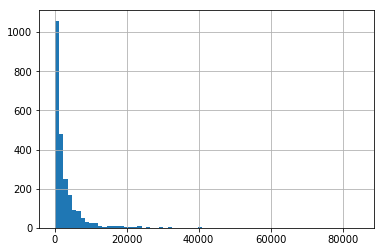

In [28]:
tweet_data.retweet_count.hist(bins=70)

In [29]:
tweet_data.retweeted.value_counts()

False    2339
Name: retweeted, dtype: int64

#### Quality
##### `Twitter archive enhance` table

1. Timestamp and Retweeted_status_timestamp, should be a datetime objects
2. The in_reply_to_status_id and in_reply_to_user_id are flot data type, instead of intengers or strings
3. Several Nan values in the in_reply_to_status_id and in_reply_to_user_id or retweeted_status_id and retweeted_status_user_id
4. There are 2297 instead of 2356 values for the expanded_urls
5. Several unclear rating_numerator values
6. Some unclear rating_denominator values
7. Most of the urls are duplicated as ,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>". Most of the are, hence, useless.
8. Some dog names incorrect such as "a" or "the" or "an".
9. If dogs have to be either doggos, floofers, puppers or puppos, there are many unclassified. 

##### `image-predictions` table

10. The table has 2075 values instead of 2356
11. (2075 - 2009) jpg Urls duplicated
12. 325 out of 2075 have the three predictions p1, p2 and p3 not defined as a breed of dog.
                                                                  
##### `tweet_json.txt` file

13. date_time should be a datetime type instead of an object
14. Unnecessary column "retweeted": all False.

#### Tidiness

Following Hadley Wickham criteria:

1. Each variable must have its own column
2. Each observation must have its own row
3. Each value must have its own cell
4. Each "kind" of variable in a data set(linked with the others)

According this:

- `Twitter archive enhance` table does not meet the rule number 1 since the dog stage is one variable
- All the data frame from `tweet_json.txt` file and `twitter-archive-enhanced.csv` contain similar or, at least, consistent, so they could be merged in a unique data frame meeting with rule number 4. 


## Cleaning 

In the next section we will go through some of the quality issues,  cleaining or tidying up them following `Project Rubric` indications.
Firstly, and following the aforementioned ideas, a copy of the three data sets will be made. 

In [30]:
twitter_data_v2=twitter_data.copy()
Imagenes_data_v2=Imagenes_data.copy()
tweet_data_v2=tweet_data.copy()

In [31]:
Imagenes_data_v2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness

It has been firstly merged both the data from the json.txt file and the twitter-archive-enhanced.csv data to prevent doing some of the cleaning twice. So, given both, data frame from `tweet_json.txt` file and `twitter-archive-enhanced.csv` contain similar or, at least, consistent,they will be merged in a unique data frame.  
In addition to this, in order to create a unique data frame, this aforementioned dataframe has also been merged with the Images  data frame. 



**Define**

1- Merging data

First the size and "uniqueness" of the ID's are checked. 

In [63]:
print(twitter_data_v2.shape)
print(tweet_data_v2.shape)
print(Imagenes_data_v2.shape)


(2356, 17)
(2339, 6)
(2075, 12)


All the ID in both data frames are different. 

**Code**

Merging twitter_data and tweet_data by `tweet_id` mantaining all the values from the larger data set.

In [65]:
All_tweet_data=pd.merge(twitter_data_v2, tweet_data_v2, on='tweet_id', how='left')
All_tweet_data.shape

(2356, 22)

As a consequence of the join, the following 16 values have "added" to the tweet_data_v2 data frame.

In [66]:
twitter_data_v2[~twitter_data_v2.tweet_id.isin(tweet_data_v2.tweet_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,None,None,None,None
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,None,None,None,None


All the values tweet_ids in the Imagenes_data set are included in the All_tweet_data.

And all the tweet ids in the tweet_data are included in the twitter_data set:

In [67]:
print(pd.merge(All_tweet_data, Imagenes_data_v2, on='tweet_id', how='inner').shape)
print(pd.merge(twitter_data_v2, tweet_data_v2, on='tweet_id', how='inner').shape)

(2075, 33)
(2339, 22)


In [68]:
All_tweet_data=pd.merge(All_tweet_data, Imagenes_data_v2, on='tweet_id', how='left')


**Test**

In [69]:
print(All_tweet_data.shape)
All_tweet_data.head()

(2356, 33)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


We save a copy of this data frame as well. 

In [70]:
All_tweet_data_v2=All_tweet_data.copy()

### Quality
##### `Twitter archive enhance` table

**Define**

A - Timestamp and Retweeted_status_timestamp, should be a datetime objects
    Part of the isssue not included in the list would be to last five digits (which, supposedly, are the tenths or hundreds, etc... of a second). They will be removed. 
    
    - Removing final part of the date string:

**Code**

In [71]:
All_tweet_data_v2.timestamp= All_tweet_data_v2.timestamp.str.replace(' \+0000','')
All_tweet_data_v2.timestamp.head()
All_tweet_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text_x                        2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

    - Changing data types to datetime.

In [72]:
All_tweet_data_v2.retweeted_status_timestamp=All_tweet_data_v2.retweeted_status_timestamp.str.replace(' \+0000','')
All_tweet_data_v2.retweeted_status_timestamp
# Checking if the values are correctly cleaned. 
All_tweet_data_v2.retweeted_status_timestamp.dropna().head()

19    2017-07-19 00:47:34
32    2017-07-15 02:44:07
36    2017-02-12 01:04:29
68    2017-06-23 01:10:23
73    2017-06-23 16:00:04
Name: retweeted_status_timestamp, dtype: object

**Test**

In [73]:
All_tweet_data_v2.timestamp=pd.to_datetime(All_tweet_data_v2.timestamp)
All_tweet_data_v2.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [74]:
All_tweet_data_v2.retweeted_status_timestamp=pd.to_datetime(All_tweet_data_v2.retweeted_status_timestamp)
All_tweet_data_v2.retweeted_status_timestamp.dropna().head()

19   2017-07-19 00:47:34
32   2017-07-15 02:44:07
36   2017-02-12 01:04:29
68   2017-06-23 01:10:23
73   2017-06-23 16:00:04
Name: retweeted_status_timestamp, dtype: datetime64[ns]



B - The in_reply_to_status_id and in_reply_to_user_id are flot data type, instead of intengers. All the ids should be considered integers of factors. They are going to be changed to integers in this case.

   Since there are Nan's float data type is considered appropiate.

In [75]:
All_tweet_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text_x                        2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count   

**Define**

4 - There are 2297 instead of 2356 values for the expanded_urls. 


All these expanded urls are filled with and "unknown" label. 

**Code**

In [76]:
All_tweet_data_v2.expanded_urls.fillna("Unknown", inplace=True)

**Test**

In [77]:
All_tweet_data_v2[All_tweet_data_v2.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define**

5 - Several unclear rating_numerator values. 

In [78]:
All_tweet_data_v2.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [79]:
print(All_tweet_data_v2.rating_numerator.median(),All_tweet_data_v2.rating_numerator.mean())

11.0 13.12648556876061


There could be some kind of link between those values with a wrong denominator and those with an strange numerator. Subsetting those values with a denominator different from 10:


In [80]:
All_tweet_data_v2[['rating_numerator','rating_denominator']][All_tweet_data_v2.rating_denominator!=10]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


**Code**

Eventhough we know the ambiguous and peculiar rating system in the  `WeRateDogs` data set, there are some values that are unlikely or erroneous. In any case, they are values that could bias significantly any statistic. Since the mean and median are around 11-13, it has been decided to remove all the values above 30.

In additions, almost all of these values are unique which prove they are likely mistakes or errors.

In [81]:
All_tweet_data_v2.rating_numerator[All_tweet_data_v2.rating_numerator>30].value_counts()


420     2
75      2
60      1
143     1
99      1
165     1
144     1
204     1
45      1
1776    1
80      1
44      1
50      1
84      1
182     1
88      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [82]:
All_tweet_data_v2=All_tweet_data_v2[All_tweet_data_v2.rating_numerator<=30]

**Test**

In [83]:
All_tweet_data_v2.rating_numerator.value_counts().sort_index()

0       2
1       9
2       9
3      19
4      17
5      37
6      32
7      55
8     102
9     158
10    461
11    464
12    558
13    351
14     54
15      2
17      1
20      1
24      1
26      1
27      1
Name: rating_numerator, dtype: int64

**Define**

6 - Some unclear rating_denominator values with values different to 10 (as it would be expected).


In [84]:
All_tweet_data_v2.rating_denominator.value_counts()

10    2326
11       3
20       2
15       1
7        1
16       1
2        1
Name: rating_denominator, dtype: int64

**Code**

It is assumed all the rating are rated over 10, so all these values are corrected and assumed equal to 10. Most of these values were already removed from the dataset when removing the assumedly wrong numerators. Only remain 8 values. 

In [85]:
All_tweet_data_v2[['rating_denominator','rating_numerator']][All_tweet_data_v2.rating_denominator!=10]

,rating_denominator,rating_numerator
342,15,11
516,7,24
784,11,9
1068,11,9
1165,20,4
1598,20,4
1662,11,7
1663,16,20
2335,2,1


In [86]:
All_tweet_data_v2.rating_denominator=10

**Test**

In [87]:
All_tweet_data_v2.rating_denominator.value_counts()

10    2335
Name: rating_denominator, dtype: int64

**Define** 

8- Some dog names incorrect such as "a" or "the" or "an"

**Code**

It has been removed some assumed incorrect names step by step.

In [88]:
All_tweet_data_v2.name[All_tweet_data_v2.name.str.len() < 2].value_counts()

a    54
O     1
Name: name, dtype: int64

All the names with a name with only one letter  (`a's` and `0`) are changed to *`None`*

In [89]:
All_tweet_data_v2.name[All_tweet_data_v2.name.str.len() < 2]='None'

C:\Users\cacho\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
All_tweet_data_v2.name[All_tweet_data_v2.name.str.len() < 3].value_counts()

Bo    9
an    7
my    1
JD    1
Jo    1
Al    1
Mo    1
by    1
Ed    1
Name: name, dtype: int64

Some of the previous names could be real, but those starting with a lowercase letter are clearly incorrect, so they are changed to 'None'

In [91]:
All_tweet_data_v2.name[(All_tweet_data_v2.name.str.len() < 3) & (All_tweet_data_v2.name.str.contains('^[(a-z)]'))]

759     an
852     my
1025    an
1362    an
1724    by
2204    an
2333    an
2335    an
2349    an
Name: name, dtype: object

In [92]:
All_tweet_data_v2.name[(All_tweet_data_v2.name.str.len() < 3) & (All_tweet_data_v2.name.str.contains('^[(a-z)]'))]='None'

C:\Users\cacho\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Many of the names are, actually, starting with a lowercase letter. They appeart to be wrong, so they are also changed to 'None'

In [93]:
All_tweet_data_v2.name[(All_tweet_data_v2.name.str.contains('^[(a-z)]'))].value_counts()

the             8
very            5
just            4
one             4
quite           4
not             2
actually        2
mad             2
getting         2
light           1
his             1
officially      1
unacceptable    1
all             1
such            1
incredibly      1
infuriating     1
space           1
life            1
old             1
Name: name, dtype: int64

In [94]:
All_tweet_data_v2.name[(All_tweet_data_v2.name.str.contains('^[(a-z)]'))]='None'

C:\Users\cacho\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Test**

In [95]:
All_tweet_data_v2.name[(All_tweet_data_v2.name.str.len() < 3) & (All_tweet_data_v2.name.str.contains('^[(a-z)]'))]

Series([], Name: name, dtype: object)

In [96]:
All_tweet_data_v2.name[All_tweet_data_v2.name.str.len() < 3].value_counts()

Bo    9
JD    1
Jo    1
Mo    1
Al    1
Ed    1
Name: name, dtype: int64

In [97]:
All_tweet_data_v2.name[(All_tweet_data_v2.name.str.contains('^[(a-z)]'))].value_counts()

Series([], Name: name, dtype: int64)

In [98]:
All_tweet_data_v2.name[All_tweet_data_v2.name.str.contains('^[(0-9)]')]

Series([], Name: name, dtype: object)

**Define (Quality)**

9- If dogs have to be either doggos, floofers, puppers or puppos, there are many unclassified
This includes one of the tidiness issues, gathering the dog stage as a unique variable. Those dogs not classified are defined as "unclassified".  

** Define (Tidiness)**

2- `Twitter archive enhance` table does not meet the rule number 1 since the dog stage is one variable, so all the stages (doggo, floofer, pupper, puppo) are going to be gather in a unique column.  


**Code**

In [99]:
All_tweet_data_v2.shape

(2335, 33)

In [100]:
All_tweet_data_v2['unknown']=False

In [101]:
for index in All_tweet_data_v2.index:
    if (All_tweet_data_v2.loc[index,'pupper']=='None' and All_tweet_data_v2.loc[index,'puppo']=='None' and All_tweet_data_v2.loc[index,'floofer']=='None' and All_tweet_data_v2.loc[index,'doggo']=='None'):
        All_tweet_data_v2.loc[index, 'unknown']='Unknown'
    else:
        All_tweet_data_v2.loc[index, 'unknown']='None'

In [106]:
All_tweet_data_v2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text_x', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'text_y', 'retweeted', 'date_time',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'unknown'],
      dtype='object')

In [107]:
column_names=list(All_tweet_data_v2.columns.values)
stages=list(list(All_tweet_data_v2.columns.values)[i] for i in [13, 14,15,16,33])
Remaining_columns=[names for names in column_names if names not in stages]

In [108]:
Remaining_columns

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text_x',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'text_y',
 'retweeted',
 'date_time',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [109]:
#Test=pd.melt(All_tweet_data_v2, Remaining_columns)
All_tweet_data_v2=pd.melt(All_tweet_data_v2, id_vars=Remaining_columns, value_vars=stages, var_name="Remove", value_name='Stage')

In [110]:
All_tweet_data_v2=All_tweet_data_v2.drop('Remove', 1)

In [111]:
All_tweet_data_v2=All_tweet_data_v2[All_tweet_data_v2.Stage!='None']

**Test**

In [112]:
All_tweet_data_v2.Stage.value_counts()

Unknown    1955
pupper      257
doggo        97
puppo        30
floofer      10
Name: Stage, dtype: int64

##### `tweet_json.txt` file

**Define**

13. date_time should be a datetime type instead of an object

**Code**

In [117]:
All_tweet_data_v2.date_time=All_tweet_data_v2.date_time.str.replace(' \+0000','')
All_tweet_data_v2.date_time=pd.to_datetime(All_tweet_data_v2.date_time)

**Test**

In [120]:
All_tweet_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 9 to 11674
Data columns (total 30 columns):
tweet_id                      2349 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2349 non-null datetime64[ns]
source                        2349 non-null object
text_x                        2349 non-null object
retweeted_status_id           182 non-null float64
retweeted_status_user_id      182 non-null float64
retweeted_status_timestamp    182 non-null datetime64[ns]
expanded_urls                 2349 non-null object
rating_numerator              2349 non-null int64
rating_denominator            2349 non-null int64
name                          2349 non-null object
retweet_count                 2332 non-null float64
favorite_count                2332 non-null float64
text_y                        2332 non-null object
retweeted                     2332 non-null object
date_time    

## Save data into a csv file.


In [127]:
All_tweet_data_v2.to_csv('twitter_archive_master.csv', sep=";", encoding='utf-8')